In [1]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import os

In [10]:
model_path = 'detector.tflite'

In [11]:
image=cv2.imread("1405992.jpg",cv2.COLOR_BGR2RGB)

In [12]:
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.FaceDetectorOptions(base_options=base_options,min_detection_confidence=0.5)
detector = vision.FaceDetector.create_from_options(options)

# STEP 3: Load the input image.
mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image)

# STEP 4: Detect faces in the input image.
detection_result = detector.detect(mp_image)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [10]:
detection_result

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=676, origin_y=202, width=250, height=250), categories=[Category(index=0, score=0.8129085898399353, display_name=None, category_name=None)], keypoints=[NormalizedKeypoint(x=0.4689760208129883, y=0.32534873485565186, label='', score=0.0), NormalizedKeypoint(x=0.5304749011993408, y=0.30826443433761597, label='', score=0.0), NormalizedKeypoint(x=0.5062373876571655, y=0.3900600075721741, label='', score=0.0), NormalizedKeypoint(x=0.5101418495178223, y=0.43801337480545044, label='', score=0.0), NormalizedKeypoint(x=0.43275365233421326, y=0.3371152877807617, label='', score=0.0), NormalizedKeypoint(x=0.5674665570259094, y=0.2995697259902954, label='', score=0.0)])])

In [13]:
bbox=detection_result.detections[0].bounding_box
x,y = bbox.origin_x, bbox.origin_y
x1,y1 = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height

In [14]:
x,y,x1,y1

(676, 202, 926, 452)

In [24]:
c_image=image[y:y1+30, x:x1]

In [21]:
#cv2.imshow("cropped",c_image)

In [22]:
import matplotlib.pyplot as plt

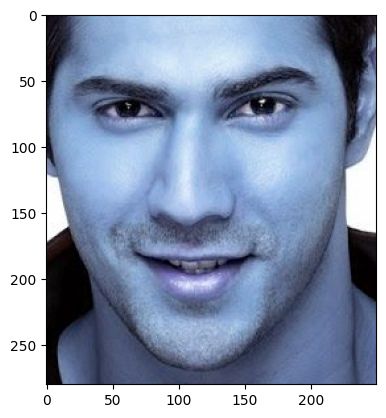

In [25]:
plt.imshow(c_image)

In [26]:
cv2.imwrite("test.jpg", c_image)

True

In [27]:
#cv2.destroyAllWindows()

In [31]:
root_folder="/home2/souvikg544/gridcorpus/video"

In [ ]:
save_root="/home2/souvikg544/gridcorpus/faces"

In [32]:
speakers=os.listdir(root_folder)

In [ ]:
for s in speakers:
    s_path=os.path.join(root_folder,s)
    for videos in os.listdir(s_path):
        faces_save_path=os.path.join(save_root,s,videos.split(".")[0])
        os.mkdir(faces_save_path,exist_ok=True)
        process_videos(os.path.join(s_path,videos),faces_save_path)

In [33]:
from tqdm import tqdm

ModuleNotFoundError: No module named 'tqdm'

In [14]:
def process_frame(image,i,save_path1):
        # saves the file
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image)
        detection_result = detector.detect(mp_image)
        bbox=detection_result.detections[0].bounding_box
        x,y = bbox.origin_x, bbox.origin_y
        x1,y1 = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
        c_image=image[y:y1+30, x:x1]
        save_location=os.path.join(save_path1,f"{i}.jpg")
        cv2.imwrite(save_location, c_image)

In [ ]:
## Begin preprocessing

In [3]:
import cv2
import os
import shutil

for j in range(1,6,1):

    print(f"----------------------------------- Speaker {j} --------------------------------------")
    for files in os.listdir(f"/ssd_scratch/cvit/souvikg544/gridcorpus/faces/s{j}"):
        #video_path=os.path.join(f"/home2/souvikg544/gridcorpus/video/s{j}/",files)
       
        folder_path=os.path.join(f"/ssd_scratch/cvit/souvikg544/gridcorpus/faces/s{j}",files)
        align_path=os.path.join(f"/ssd_scratch/cvit/souvikg544/gridcorpus/transcription/s{j}",f"{files}.align")
        # Check if the video capture object is successfully opened
    
        # try:
        #     cap = cv2.VideoCapture(video_path)
        # except:
        #     print(f"Some error in file -{video_path} ----- skip")
        #     continue
        # i=0
        # # Loop through the frames
        # while cap.isOpened():
            
        #     ret, frame = cap.read()  # Read a frame
            
        #     if not ret:
        #         break  # Break the loop when the video ends
        #     i+=1
            
        #     #process_frame(frame,i,"save_test")  # Process the frame using the defined function
              
        # cap.release()
        if not os.path.exists(align_path):
            shutil.rmtree(folder_path)
            continue
        align_data = []
        with open(align_path, 'r') as align_file:
            for line in align_file:
                _,timestamp, label = line.strip().split()
                label=label.lower()
                # if(label=="sil"):
                #     continue
                align_data.append(label)
        
        i=75
        file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        if ((file_count != i) or (len(align_data)!=8)):
            shutil.rmtree(folder_path)
            print(f"{folder_path} ---- file count ---{file_count} ----- opencv count {i}  ---len{len(align_data)}")

----------------------------------- Speaker 1 --------------------------------------
----------------------------------- Speaker 2 --------------------------------------
----------------------------------- Speaker 3 --------------------------------------
----------------------------------- Speaker 4 --------------------------------------
----------------------------------- Speaker 5 --------------------------------------


In [2]:
!nvidia-smi

Fri Aug 25 15:29:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.108.03   Driver Version: 510.108.03   CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 29%   45C    P0    55W / 250W |      0MiB / 11264MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [50]:
image = cv2.imread("test.jpg",cv2.COLOR_BGR2RGB)
    
    # Get the height and width of the image
height, width, _ = image.shape
    
    # Calculate the starting position for cropping
start_y = height // 2
    
    # Calculate the ending position for cropping
end_y = height

cropped_image = image[start_y:end_y, :]

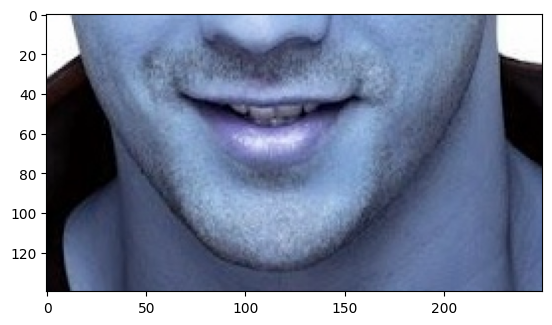

In [51]:
import matplotlib.pyplot as plt
plt.imshow(cropped_image)

In [48]:
cv2.destroyWindow('x')

In [16]:
import os
import torch
from torch.utils.data import Dataset, DataLoader,SubsetRandomSampler
from torchvision import transforms
import cv2
import numpy as np
import glob
from torchtext.vocab import vocab
from collections import Counter, OrderedDict

class lipnet_data(Dataset):
    def __init__(self, root_folder):
        self.root_folder_faces =  os.path.join(root_folder,"faces")
        self.root_folder_transcription= os.path.join(root_folder,"transcription")
        self.frames_folder=glob.glob(os.path.join(self.root_folder_faces,"**/*"), 
                   recursive = False)
        
        self.transform = transforms.Compose([transforms.Resize((100,100)),
                                             transforms.ToTensor()])
        self.getwordlist()

    def getwordlist(self):
        label_files=glob.glob(os.path.join(self.root_folder_transcription,"**/*"), 
                   recursive = False)

        self.words=[]
        for f in label_files:
            with open(f, 'r') as align_file:
                for line in align_file:
                    _,timestamp, label = line.strip().split()
                    label=label.lower()
                    if(label=="sil"):
                        continue
                    self.words.append(label)
        self.counter = Counter(self.words)
        sorted_by_freq_tuples = sorted(self.counter.items(), key=lambda x: x[1], reverse=False)
        ordered_dict = OrderedDict(sorted_by_freq_tuples)
        self.v1 = vocab(ordered_dict)
        #print(len(self.v1))
        #self.v1.set_default_index(-1)
                
    def __len__(self):        
        return len(self.frames_folder)
    
    def __getitem__(self, idx):
        video_frames = self.frames_folder[idx]
        video_name=  video_frames.split("/")[-1]
        speaker_name = video_frames.split("/")[-2]
        
        align_path = os.path.join(self.root_folder_transcription,speaker_name, f"{video_name}.align")
        frames=[]
        for i in range(1,76,1):
            im_path=os.path.join(video_frames,f"{i}.jpg")
            if not os.path.exists(im_path):
                if i!=0:
                    im_path=os.path.join(video_frames,f"{i-1}.jpg")
                else:
                    im_path=os.path.join(video_frames,f"{i+1}.jpg")
            image=cv2.imread(im_path,cv2.COLOR_BGR2RGB)            
            height, width, _ = image.shape
            start_y = height // 2
            end_y = height           
            cropped_image = image[start_y:end_y, :]
            cropped_image=cv2.resize(cropped_image, (128, 64))
            cropped_image=cropped_image/255.
            #cropped_image=self.transform(cropped_image)
            frames.append(cropped_image)
       

        align_data = []
        with open(align_path, 'r') as align_file:
            for line in align_file:
                _,timestamp, label = line.strip().split()
                label=label.lower()
                if(label=="sil"):
                    continue
                align_data.append(self.v1[label])
        
        align_data = torch.tensor(align_data)
        frames=torch.tensor(np.array(frames))
        frames=frames.permute(3, 0, 1, 2)
        return frames.float(), align_data.float()


In [22]:
root_folder = '/ssd_scratch/cvit/souvikg544/gridcorpus/'
dataset = lipnet_data(root_folder)
dataset_size=len(dataset)
train_ratio = 0.8  # Split ratio for training data
train_size = int(train_ratio * dataset_size)
eval_size = dataset_size - train_size

# Split dataset into training and evaluation subsets
train_indices = list(range(train_size))
eval_indices = list(range(train_size, dataset_size))

# Create SubsetRandomSampler for training and evaluation
train_sampler = SubsetRandomSampler(train_indices)
eval_sampler = SubsetRandomSampler(eval_indices)

# Create data loaders with the defined samplers
train_dataloader = DataLoader(dataset, batch_size=32, sampler=train_sampler)
eval_dataloader = DataLoader(dataset, batch_size=32, sampler=eval_sampler)

In [18]:
len(dataset)

4703

In [14]:
a,b=dataset.__getitem__(366)

In [15]:
a.shape

torch.Size([3, 75, 64, 128])

In [16]:
b.shape

torch.Size([6])

In [ ]:
# for batch_images, batch_align in dataloader:
    

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class lipnet_model(nn.Module):
    def __init__(self, num_classes):
        super(lipnet_model, self).__init__()
        self.conv1 = self.convlayer(in_channels=3, out_channels=32, kernel_size=(3, 5, 5), stride=(5, 2, 2), padding=(1, 2, 2))
        self.conv2 = self.convlayer(in_channels=32, out_channels=64, kernel_size=(3, 5, 5), stride=(5, 2, 2), padding=(1, 2, 2))
        self.res1=self.convlayer(in_channels=64, out_channels=64, kernel_size=(3, 5, 5), stride=(1, 1, 1), padding=(1, 2, 2))
        self.conv3 = self.convlayer(in_channels=64, out_channels=96, kernel_size=(3, 3, 3), stride=(1, 2, 2), padding=(1, 1, 1))
        self.conv4 = self.convlayer(in_channels=96, out_channels=96, kernel_size=(3, 3, 3), stride=(1, 2, 2), padding=(1, 1, 1))
        self.res2=self.convlayer(in_channels=96, out_channels=96, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        self.conv5 = self.convlayer(in_channels=96, out_channels=96, kernel_size=(3, 3, 3), stride=(1, 2, 2), padding=(1, 1, 1))
        self.conv_transpose = self.convtranlayer(in_channels=96,out_channels=96,kernel_size=(2, 1, 1),stride=(2, 1, 1),padding=(0, 0, 0))        
        self.bi_gru1 = nn.GRU(input_size=96 * 2 * 4, hidden_size=256, bidirectional=True, batch_first=True)
        self.bi_gru2 = nn.GRU(input_size=512, hidden_size=256, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(512, num_classes)

    def convlayer(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.Conv3d(in_channels, out_channels, kernel_size, stride=stride, padding=padding),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True)
        )

    def convtranlayer(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.ConvTranspose3d(in_channels, out_channels, kernel_size, stride=stride, padding=padding),
            nn.BatchNorm3d(out_channels)
        )

    def forward(self, x):
        x1 = F.relu(self.conv1(x))
        x2 = self.conv2(x1)
        #print(x2.size())
        x2_1=self.res1(x2)
        #print(x2_1.size())
        x_res1=x2+x2_1
        x3 = F.relu(self.conv3(x_res1))
        x4 = self.conv4(x3)
        #print(x4.size())
        x4_1=self.res2(x4)
        #print(x4_1.size())
        x_res2=x4+x4_1
        x5 = F.relu(self.conv4(x_res2))
        x6=F.relu(self.conv_transpose(x5))
        batch_size, num_channels,seq_len, height, width = x6.size()
        x7 = x6.view(batch_size, seq_len, num_channels * height * width)  # Reshape for GRU input
        x8, _ = self.bi_gru1(x7)
        x9, _ = self.bi_gru2(x8)
        #print(x.size())
        x10 = self.fc1(x9)
        #print(x.size())
        return x10
# 6*52


In [34]:
# Assuming your data is organized as (batch_size, num_frames, channels, height, width)
batch_size = 16
num_frames = 75
num_channels = 3
height, width = 64,128
num_classes = 52

# Create a random input tensor
input_data = torch.randn(batch_size,num_channels,num_frames,height, width)
print("Input shape:", input_data.shape)
# Initialize the STCNN model
stcnn_model = lipnet_model(num_classes)

# Get predictions from the model
predictions = stcnn_model.forward(input_data)


print("Output shape (predictions):", predictions.shape)

Input shape: torch.Size([16, 3, 75, 64, 128])
Output shape (predictions): torch.Size([16, 6, 52])


In [23]:
len(train_dataloader) 

118

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn

# Assuming you have a CUDA-capable device available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)
# Create an instance of the model and move it to the CUDA device
model = lipnet_model(num_classes).to(device)

# Define the loss function
loss_function = nn.CrossEntropyLoss()

# Define the optimizer (e.g., stochastic gradient descent)
optimizer = optim.SGD(model.parameters(), lr=0.001)
k=0
# DataLoader loop
best_eval_loss = float('inf')


epoch_accuracy=0
for epoch in range(100):
    train_accuracy_sum=0
    eval_accuracy_sum=0
    # Training phase
    model.train()
    k=0
    for batch_images, batch_align in train_dataloader:
        k+=1
        batch_images = batch_images.to(device)
        batch_align = batch_align.to(device)

        optimizer.zero_grad()
        predictions = model.forward(batch_images)
        # predictions_reshaped = predictions.view(-1, 52)
        # targets_reshaped = batch_align.view(-1).long()
        predictions_reshaped = predictions.permute(0,2,1)
        targets_reshaped = batch_align.long()
        loss = loss_function(predictions_reshaped, targets_reshaped)
        loss.backward()
        optimizer.step()
        if(k%10==0):
            print(".", end=" ")

        
        predicted_labels = torch.argmax(predictions, dim=2)
        correct_predictions = torch.sum(predicted_labels == batch_align)
        total_predictions = predicted_labels.numel()  # Total number of elements in the tensor
        accuracy = (correct_predictions.item() / total_predictions) * 100
        train_accuracy_sum+=accuracy
    
    epoch_accuracy=train_accuracy_sum/len(train_dataloader)        
        

    # Evaluation phase
    model.eval()
    eval_loss = 0.0
    with torch.no_grad():
        for eval_images, eval_align in eval_dataloader:
            eval_images = eval_images.to(device)
            eval_align = eval_align.to(device)
            eval_predictions = model.forward(eval_images)
            eval_predictions_reshaped = eval_predictions.permute(0,2,1)
            eval_targets_reshaped = eval_align.long()
            eval_batch_loss = loss_function(eval_predictions_reshaped, eval_targets_reshaped)
            eval_loss += eval_batch_loss.item()
            
            eval_predicted_labels = torch.argmax(eval_predictions, dim=2)            
            eval_correct_predictions = torch.sum(eval_predicted_labels == eval_align)
            eval_total_predictions = eval_predicted_labels.numel()  # Total number of elements in the tensor
            eval_accuracy = (eval_correct_predictions.item() / eval_total_predictions) * 100
            eval_accuracy_sum+=eval_accuracy
        epoch_eval_accuracy=eval_accuracy_sum/len(eval_dataloader)

    

    eval_loss /= len(eval_dataloader)

    # Print epoch, training loss, and evaluation loss
    print(f"Epoch [{epoch+1}/100], Training Loss: {loss.item():.4f}, Training accuracy: {epoch_accuracy:.4f}, Eval Loss: {eval_loss:.4f}, Eval Accuracy: {epoch_eval_accuracy:.4f}")
    print(" ")

cuda
. . . . . . . . . . . Epoch [1/100], Training Loss: 3.7635, Training accuracy: 8.9743, Eval Loss: 3.7791, Eval Accuracy: 13.6752
 
. . . . . . . . . . . Epoch [2/100], Training Loss: 3.6417, Training accuracy: 13.3323, Eval Loss: 3.6623, Eval Accuracy: 13.3574
 
. . . . . . . . . . . Epoch [3/100], Training Loss: 3.5286, Training accuracy: 14.9727, Eval Loss: 3.5607, Eval Accuracy: 14.3109
 
. . . . . . . . . . . Epoch [4/100], Training Loss: 3.4270, Training accuracy: 16.4504, Eval Loss: 3.4712, Eval Accuracy: 15.9322
 
. . . . . . . . . . . Epoch [5/100], Training Loss: 3.3530, Training accuracy: 16.7652, Eval Loss: 3.3841, Eval Accuracy: 16.7548
 
. . . . . . . . . . . Epoch [6/100], Training Loss: 3.2475, Training accuracy: 16.9232, Eval Loss: 3.3021, Eval Accuracy: 16.7989
 
. . . . . . . . . . . Epoch [7/100], Training Loss: 3.1881, Training accuracy: 16.8761, Eval Loss: 3.2229, Eval Accuracy: 17.2463
 
. . . . . . 

In [26]:
import torch
import torch.nn as nn

# Example one-hot encoded targets and predicted logits
one_hot_targets = torch.tensor([[0, 1, 0], [1, 0, 0], [0, 0, 1]], dtype=torch.float32)
predicted_logits = torch.tensor([[0.1, 0.9, 0.2], [0.8, 0.2, 0.1], [0.3, 0.4, 0.9]], dtype=torch.float32)


# Convert one-hot encoded targets to class indices
target_indices = torch.argmax(one_hot_targets, dim=1)
print(target_indices.size(),predicted_logits.size())
# Define the CrossEntropyLoss
loss_function = nn.CrossEntropyLoss()

# Calculate the loss
loss = loss_function(predicted_logits, target_indices)

print(loss.item())


torch.Size([3]) torch.Size([3, 3])
0.7164244651794434


In [27]:
import torch
import torch.nn as nn

# Example batched predictions and float number targets
predictions = torch.randn(4, 6, 52)  # Example random predictions
targets = torch.tensor([[1.0, 2.0, 5.0, 1.0, 2.0, 0.0],
                        [2.0, 1.0, 45.0, 2.0, 1.0, 0.0],
                        [0.0, 1.0, 34.0, 23.0, 1.0, 2.0],
                        [1.0, 0.0, 23.0, 11.0, 30.0, 28.0]], dtype=torch.float32)

# Reshape predictions to (batch_size * 6, 52) and targets to (batch_size * 6,)
predictions_reshaped = predictions.view(-1, 52)
targets_reshaped = targets.view(-1).long()  # Convert targets to long (integer) type

# Define the CrossEntropyLoss
loss_function = nn.CrossEntropyLoss()

# Calculate the loss
loss = loss_function(predictions_reshaped, targets_reshaped)

print(loss.item())


4.2663960456848145


In [ ]:
# for batch_images, batch_align in dataloader:
#     model=lipnet_model(num_classes)
#     pred=model.forward(batch_images)
    

In [1]:
best_eval_loss = float(2) 

In [2]:
best_eval_loss

2.0

In [2]:
import torch

In [3]:
predictions = torch.randn(4, 6, 52)  # Example random predictions
targets = torch.tensor([[1.0, 2.0, 5.0, 1.0, 2.0, 0.0],
                        [2.0, 1.0, 45.0, 2.0, 1.0, 0.0],
                        [0.0, 1.0, 34.0, 23.0, 1.0, 2.0],
                        [1.0, 0.0, 23.0, 11.0, 30.0, 28.0]], dtype=torch.float32)

predicted_labels = torch.argmax(predictions, dim=2)

# Convert target class probabilities to target class labels

In [4]:
predicted_labels

tensor([[ 7, 10, 11, 20,  1, 38],
        [21, 14, 22, 36, 36, 41],
        [49,  9, 22, 36,  1, 13],
        [49, 12, 44, 40, 11, 12]])

In [7]:
targets

tensor([[ 1.,  2.,  5.,  1.,  2.,  0.],
        [ 2.,  1., 45.,  2.,  1.,  0.],
        [ 0.,  1., 34., 23.,  1.,  2.],
        [ 1.,  0., 23., 11., 30., 28.]])

In [9]:
targets

tensor([[ 1.,  2.,  5.,  1.,  2.,  0.],
        [ 2.,  1., 45.,  2.,  1.,  0.],
        [ 0.,  1., 34., 23.,  1.,  2.],
        [ 1.,  0., 23., 11., 30., 28.]])

In [8]:
correct_predictions = torch.sum(predicted_labels == targets)
total_predictions = predicted_labels.numel()  # Total number of elements in the tensor
accuracy = correct_predictions.item() / total_predictions * 100

In [9]:
predicted_labels == targets

tensor([[False, False, False, False, False, False],
        [False, False, False, False, False, False],
        [False, False, False, False,  True, False],
        [False, False, False, False, False, False]])